In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input ,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose = 0)

verbose 매개변수는 훈련과정 출력 조절함

verbose = 2 면 진행 막대 빼고 출력

verbose = 1 전부 출력

verbose = 0 훈련과정 나타내지 않음

In [5]:
print(history.history.keys()) ##손실과 정확도가 포함되어 있음
##complie 메서드에서 metrics 매개뱐수에 'accuracy'를 추가하였기 때문

dict_keys(['accuracy', 'loss'])


# **손실 그래프**

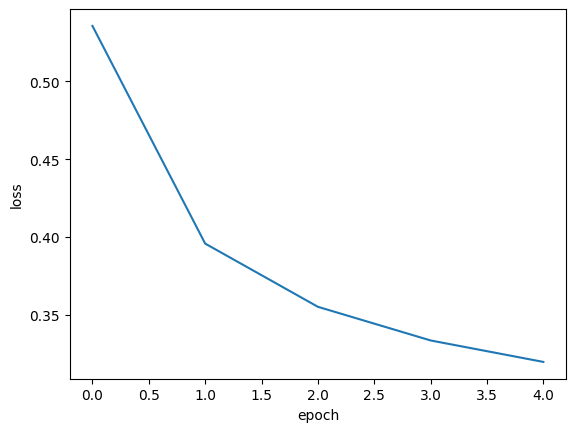

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# **정확도 그래프**

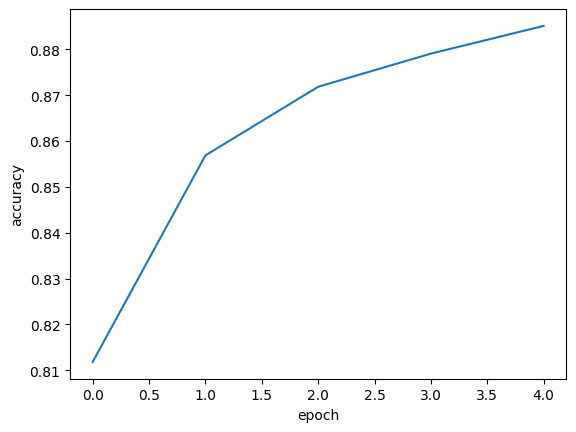

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

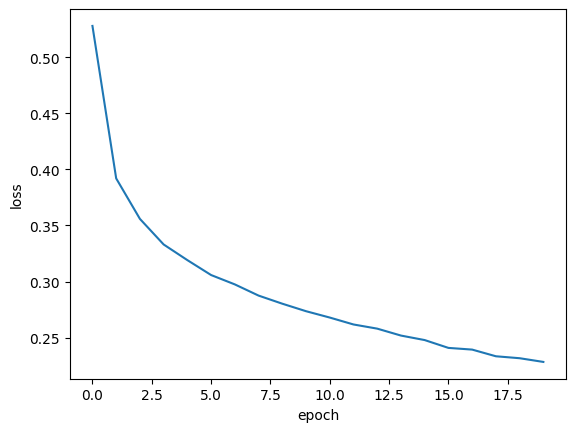

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# **검증 손실**
확률적 경사하강법에서는 과대/과서 적합과 에포크 사이의 관계를 알아봤다.

인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 적용된다.

이전에는 **정확도**를 사용하여 과대/과소적합을 설명하였지만

여기서는 **손실**을 사용하여 과대/과소 적합을 다룬다.

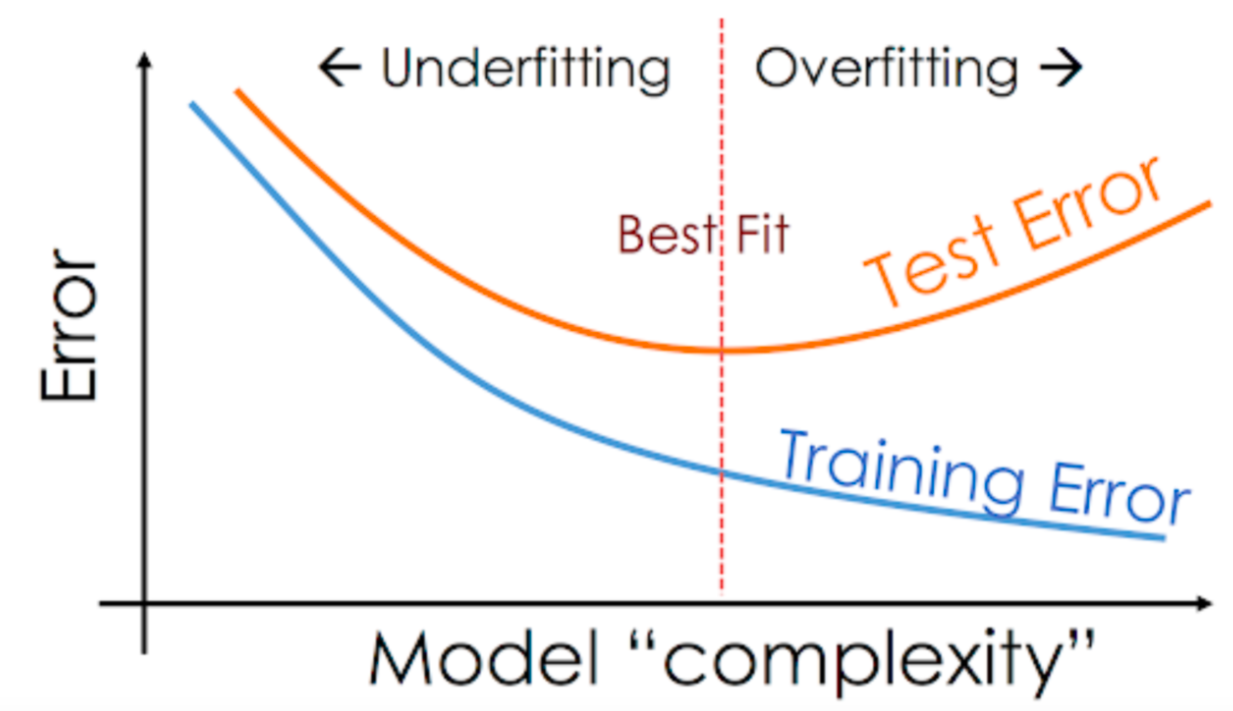

In [9]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(train_scaled, train_target,epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


검승 세트에 대한 손실도 history 값에 포함되어 있다.

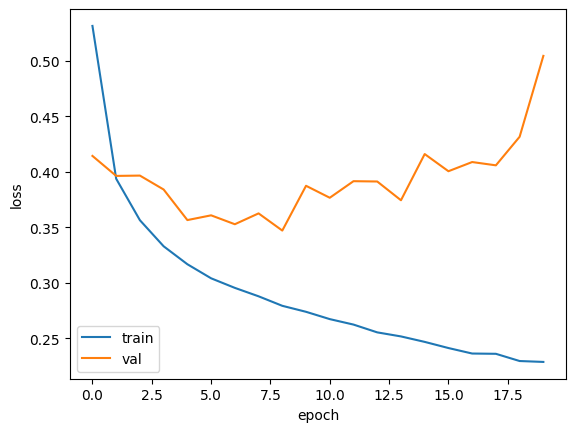

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

초기에 검증 손실이 감소하다가 세 번째 에포크(학습할 때 마다 달라짐) 만에 다시 상승하기 시작한다.

반면 훈련 손실은 꾸준히 감소하는 모습을 보이기 때문에 전형적인 과대적합 모델이 만들어진다.

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실도 줄어들고 검증 세트에 대한 정확도도 증가할 것이다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


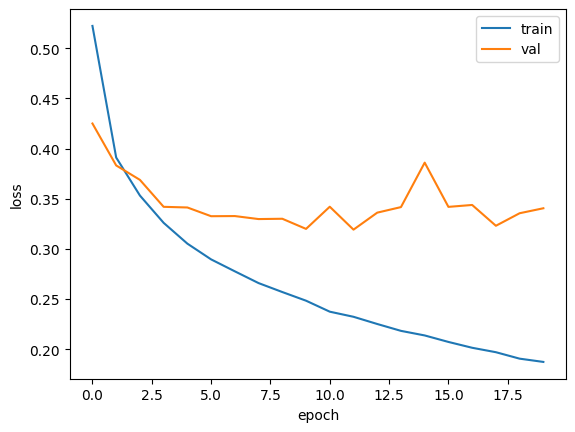

In [12]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(train_scaled, train_target,epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

옵티마이저 Adam을 사용하여 과대적합이 이전보다 훨씬 줄어든 것을 볼 수 있다.

검증 손실 그래프에 여전히 요동이 있지만 열번 째 에포크까지는 전반적으로 감소 추세가 보인다.

# **드롭아웃(dropout)**

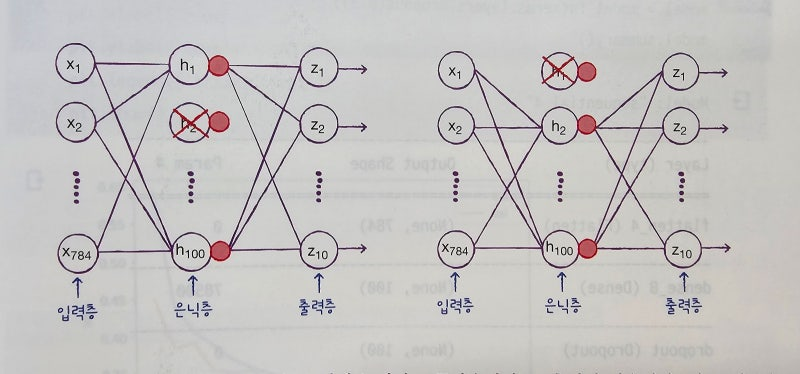

드롭아웃(dropout)은 딥러닝의 아버지로 불리는 제츠리 힌턴이 소개하였다.

이 방식은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력 = 0)과대적합을 막는다.



*   어떤 샘플을 처리할 때 은닉층의 두 번째 뉴련이 드롭아웃 되며 h2출력이 없어진다.
*   다른 샘플을 철치할 때는 은닉층의 첫 번째 뉴런이 드롭아웃되어 h1 출력이 없다.

*뉴런을 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 정해야하는 하이퍼퍼라미터이다.





이전 층의 일부 뉴런이 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야해서 과대적합을 막을 수 있다.

*드롭아웃이 적용된 2개의 신경망 그림을 보면 2개의 신경망을 앙상블(더 좋은 예측결과를 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘)하는 것 처럼 보이기도 한다.

In [13]:
model = model_fn(keras.layers.Dropout(0.3)) ## 모델의 30%정도 드롭아웃 하기
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

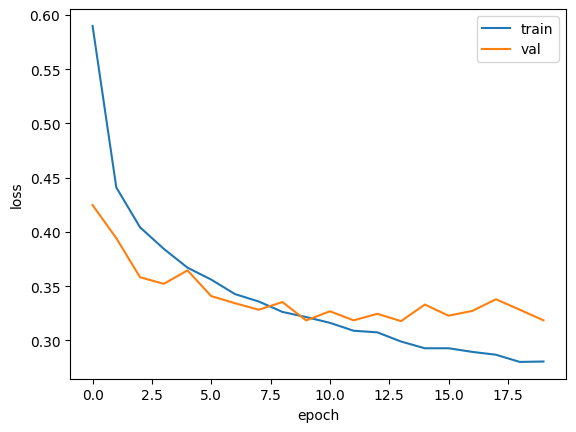

In [14]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

단순히 옵티마이저만 사용했을 때보다 과대적합이 줄어든 것을 볼 수 있다.

# **모델 저장과 목원**

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,validation_data = (val_scaled,val_target))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.save_weights('model-.weights.h5') ## 모델의 가중치를 저장

훈련된 모델의  파라미터를 함께 저장하는 save 메서드이다.

기본적으로 savedmodel 포멧으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5포멧으로 저장한다.

In [18]:
model.save('model.h5')

In [19]:
!ls -al *.h5

-rw-r--r-- 1 root root 978584 Sep 18 05:28 model.h5
-rw-r--r-- 1 root root 971928 Sep 18 05:26 model-.weights.h5


In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


훈련하지 않은 새로운 모델을 만들고 이전에 저장한 모델 파라미터를 저장하였다.
* 단 save_weights()매서드로 저장했던 모델과 같은 구조를 가져야한다.

모델의 검증 정확도를 확인해보겟다.

케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다.

검증세트의 샘플 개수는 12,000개이니 predict()메서드는 (12000,10) 크기의 배열을 반환한다.

In [22]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis = -1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.88975


모델의 predict()메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax()함수를 사용하였다.

이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다.

예를 들어 배열의 첫 번째 원소가 갖아 큰 값일 경우 0을 반환한다.

argmax()함수의 axis = -1은 배열의 마지막 차원을 따라 최댓값을 고른다.

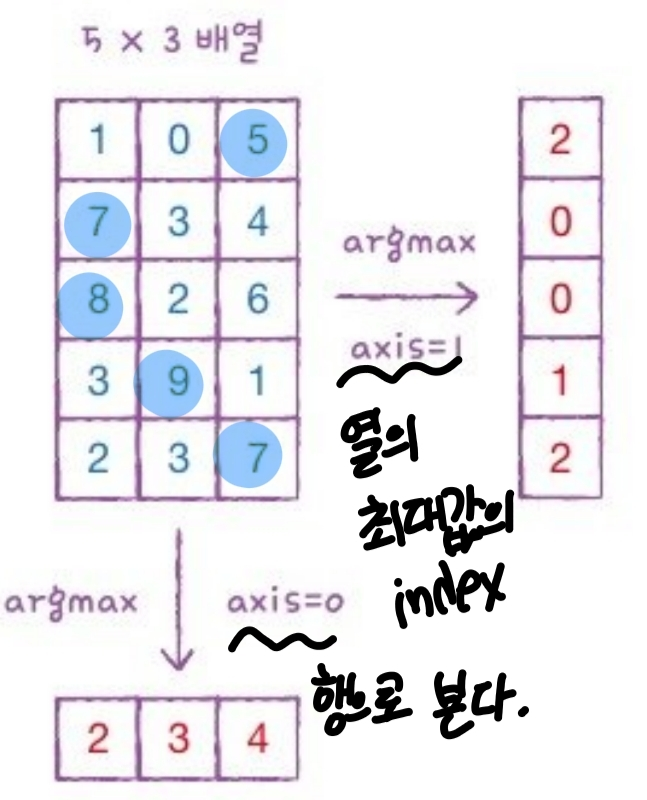

argmax 함수는 가장 큰 값의 인덱스를 반환하는 함수이다.

*인덱스 : 배열에서 그 값이 위치한 자리 번호



*   axis = 1 (열 기준)
*   axis = 0 (행 기준)
*   axis = -1(가장 마지막 축)

ex) 2차월 배열에서는 axis = 0 행 axis = 1 열을 나타내는데 axis = -1은 배열의 마지막 축이니 axis = 1과 같은 역할을 하게 된다.

고차원 배열에서는 가장 안쪽 차원에서 최대값의 인덱스를 찾는다.



In [36]:
model = keras.models.load_model('model.h5')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8909 - loss: 0.3135


[0.3152309060096741, 0.8897500038146973]

# **콜백(callback)**

훈련 과정 중간에 어던 작업을 수행할 수 있게 하는 객체

In [39]:
model = model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5.keras')

model.fit(train_scaled,train_target,epochs=20,verbose = 0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장한다.

In [40]:
model = keras.models.load_model('best-model.h5.keras')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.3623


[0.3620871901512146, 0.8841666579246521]

# **조기종료(early stopping)**
modelcheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해주는데, 검증 점수가 상승하기 시작하면 이후에는 과대적합이 커지기 때문에 훈련을 계속할 이유가 없다.

이때 훈련을 중지하면 컴퓨터 자원과 시잔을 아낄 수 있다.

이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 **조기종료(early stopping)**이라고 한다.

조기종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합을 막아주기 때문에 규제 방법 중 하나로 생각되기도 한다.

In [41]:
model = model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled,train_target,epochs=20,verbose = 0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


patience 매개변수는 검증점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.

예를 들면 patience = 2로 지정하면 2번연속 검증 점수가 향상되지 않으면 훈련을 중지한다.

또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라이터로 되돌린다.

In [42]:
print(early_stopping_cb.stopped_epoch)

10


에포크 횟수가 0부터 시작하기 때문에 10은 열한 번째 에포크에서 훈련이 중지되었다는 것을 의미한다.

patience를 2로 지정했으므로 최상의 모델은 아홉번째 에포크일 것이다.

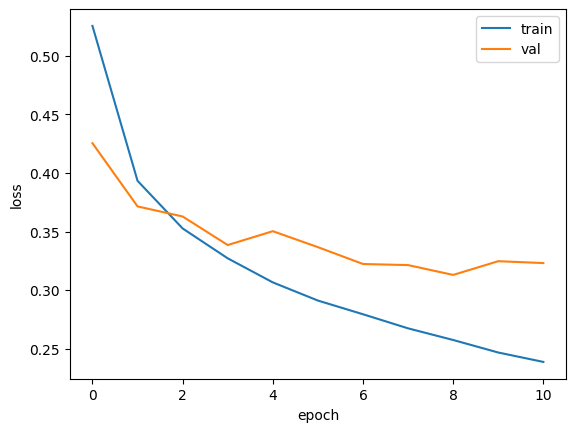

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [45]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8897 - loss: 0.3141


[0.312944620847702, 0.8863333463668823]